## Рекуррентные нейронные сети

Рекуррентные сети нашли наибольшое применение в обработке последовальных данных. Сама их архитектура была создана чтобы нейронная сеть могла понимать понятие последовательности. 

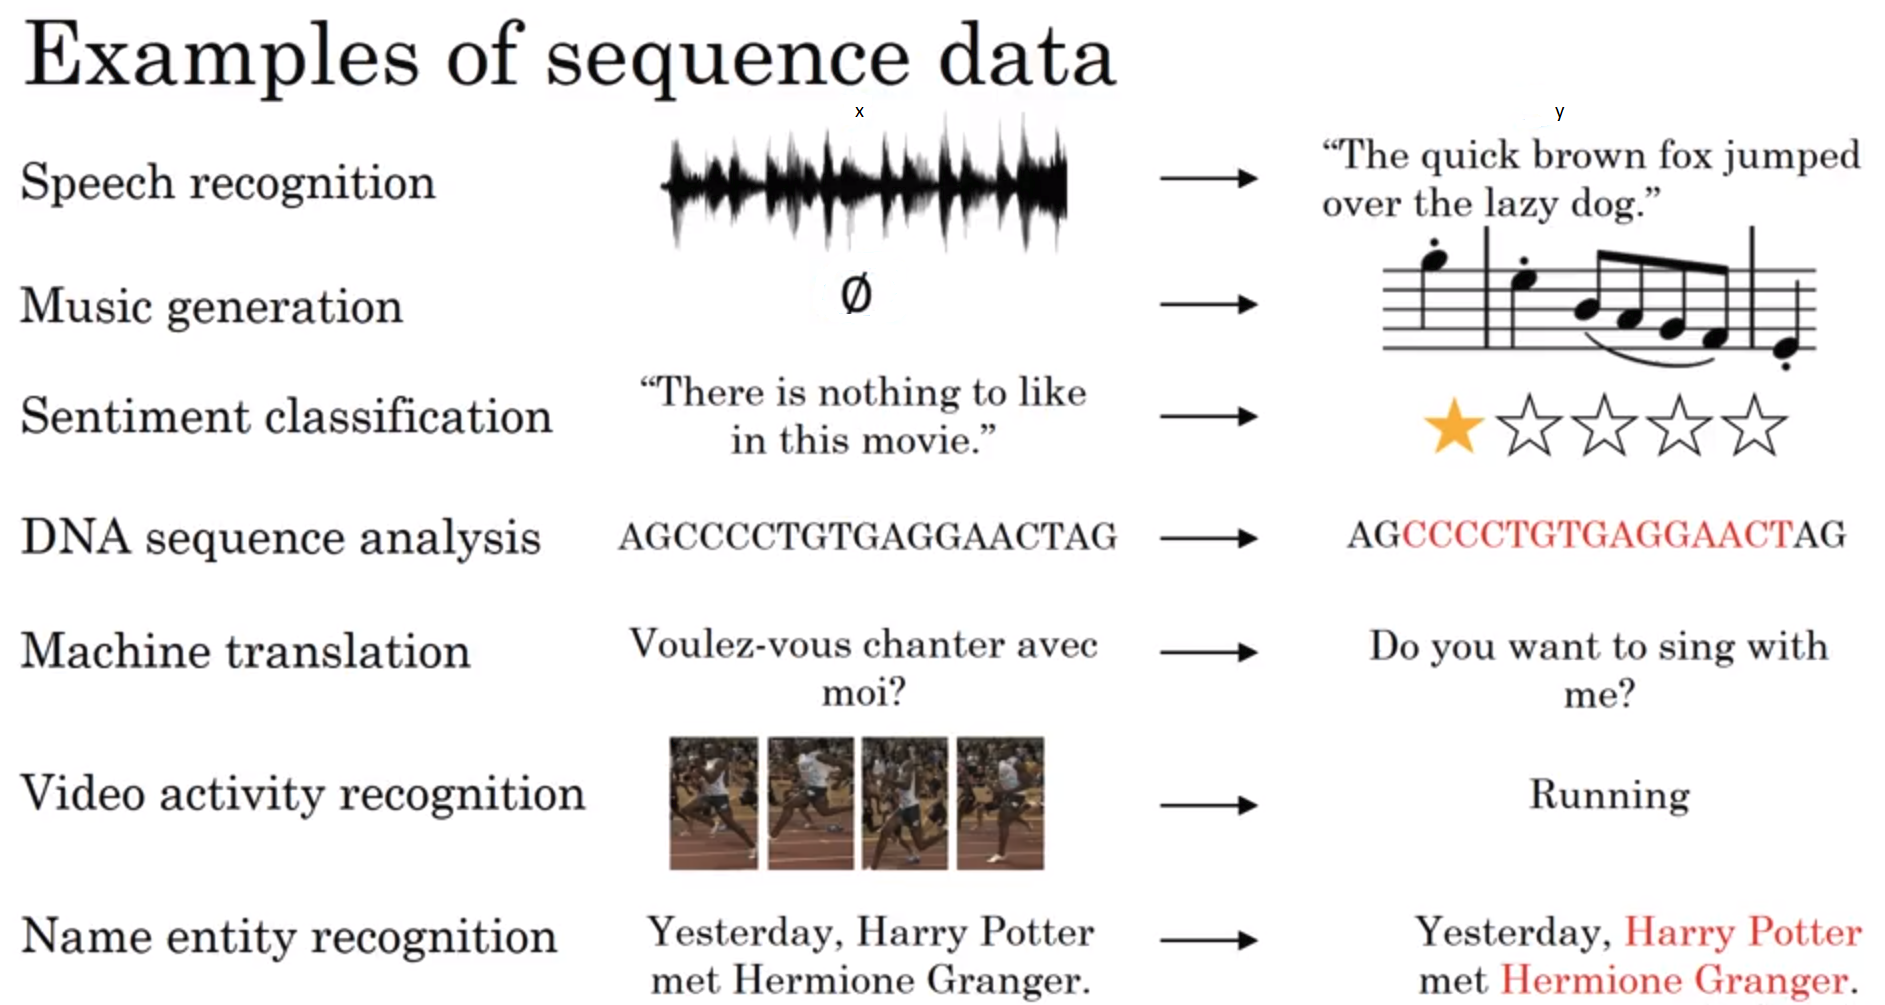

In [1]:
from IPython.display import Image
Image(filename='img/l8_1.png')

Но вначале надо вспомнить как работают классические NN, где именно они справляются хуже.

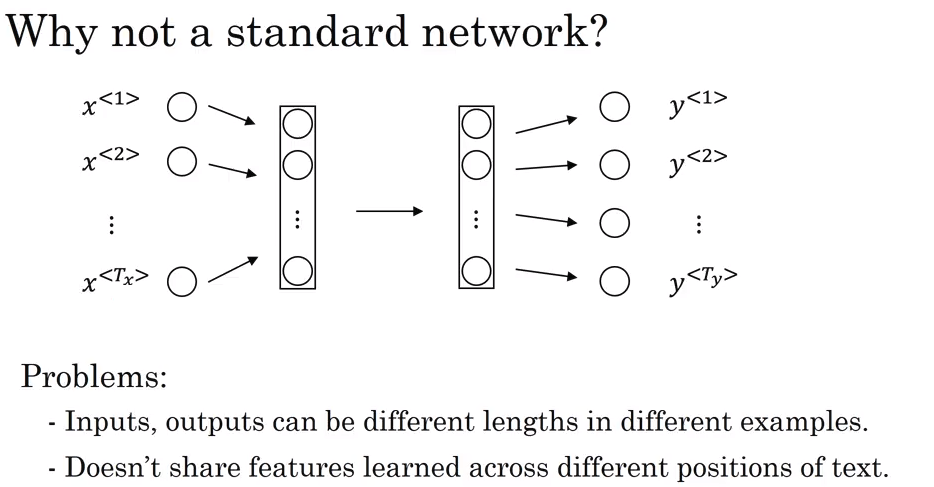

In [2]:
Image(filename='img/l8_2.png')

Первая проблема с которой мы сталкиваемся - нейронная сеть ожидает вход определённой длинны. У нас же имеется последовательсть данных: видео, текст, музыка могут иметь разную длительность. Очевидное решение, это высчитать максимальную длинну возможной последовательности и если предложение короче этой длинны добавить в конец нулей. Так себе решение, но вполне рабочее.

Вторая проблема - сеть никаким образом не обобщает веса. Если у нас есть задача определения имени из текста слово "Гарри" в начале предложения должно сигнализировать нашей сети о том, что это имя, точно так же, если "Гарри" будет в середине предложения. Это проблема любой полносвязанной (fully-connected) репрезентации. Бороться с этим можно точно так же как мы это делали при обработке изображений. Использовать свёртки. Годный-рабочий вариант.

Третья проблема - последовательность имеет значение. Если в Китае запретили биткойн секунду назад скорее всего изменение курса биткойна стоит ожидать сейчас, а не через месяц. 

Как же можно подойти к RNN на основе тех знаний что у нас уже имеются.

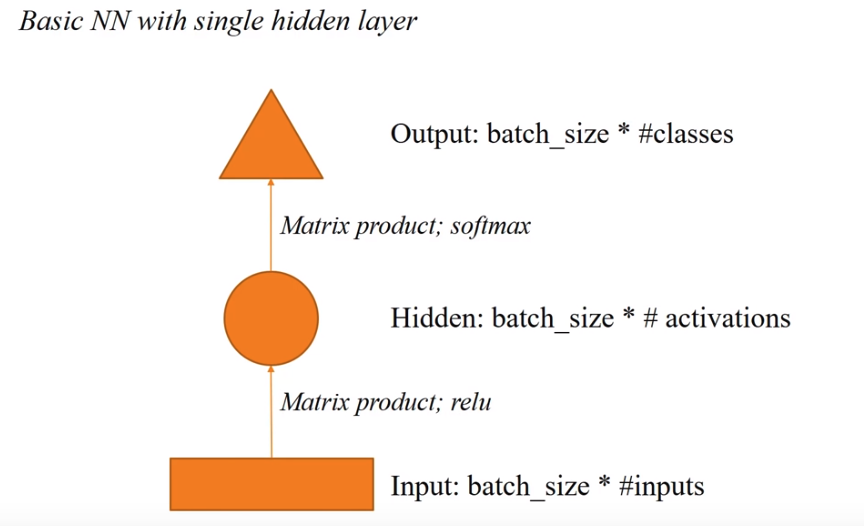

In [3]:
Image(filename='img/l8_3.png')

Просто NN выглядит таким образов. У нас имеется входной слой размерности X = (batch_size x feature_count), т.е. количество наших примеров на количество параметров (в задаче классификации изображения это была картинка 28х28=728 параметров). Далее входные параметры (X) мы перемножаем с какими то весами W, делаем активацию (ReLU). Теперь мы оказываемся в нашем скрытом слое, там так же имеются веса W, проделываем всё тоже самое и оказываемся в выходном слое, в котором, например, нас ожидает softmax функция для получения ответа.

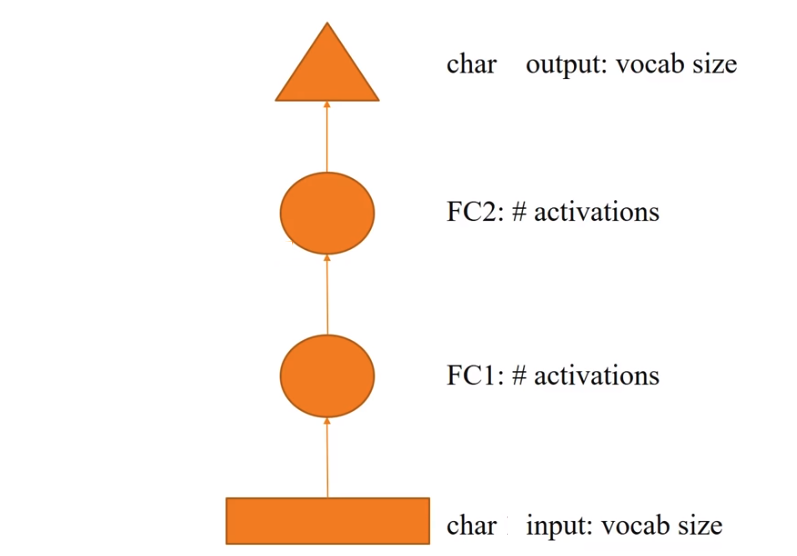

In [4]:
Image(filename='img/l8_4.png')

Но вообще говоря, нам ничего не мешает сделать абсолютно любое количество скрытых слоёв. Надо только следить за размерностями этих слоёв, чтобы матрицы могли перемножаться.

Теперь представим что мы хотим предсказывать появление определённой буквы, после буквы которая нам уже дана. Это задача простой классификации, нам надо предсказать одну буквы из словаря (допустим 33 буквы). Схема будет работать, но слова это не 2 буквы. Слово это последовательность букв. Предложение это последовательность слов. Параграф это последовательность предложений и т д. Значит нам надо научиться предсказывать буквы на основании нескольких предыдущих. Попробуем поменять нашу схему.

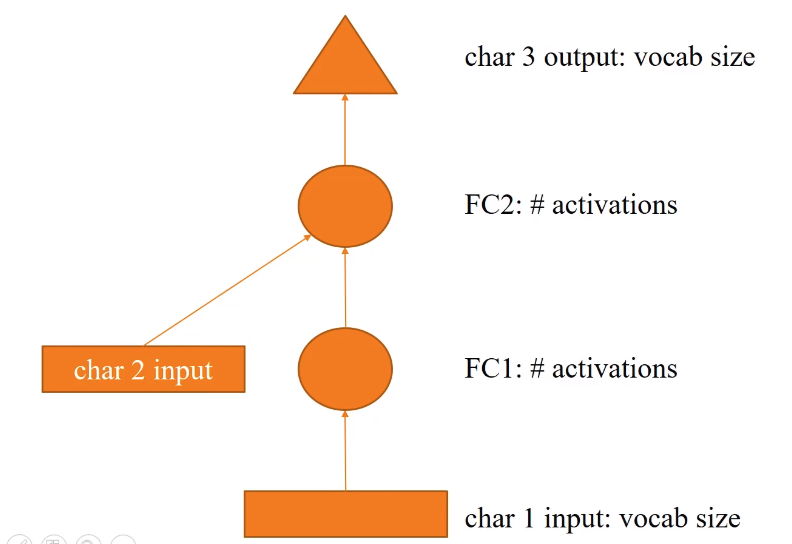

In [6]:
Image(filename='img/l8_5.png')

Теперь мы пытаемся угадать 3ю букву на основании предыдущих 2-х. Но главное отличие, что в нашей сети теперь 2 входа. Первая буква (закодированная при помощи one hot encoding или embedding ) поступает на вход умножается на веса W, активируется итд. Буква 2 входит в нашу сеть на позднем слое так же умножается на веса W активируется и встречается с тем, что получилось из буквы 1. Если мы сделаем так, чтобы размерность матрицы полученной от обработки буквы1 будет совпадать с размерностью полученной от буквы2, мы можем (допустим) сложить эти матрицы и дальше работать как если бы второй буквы и вовсе не было.

При использовании такой схемы, нас ничего не ограничивает от увеличеия букв и слоёв.

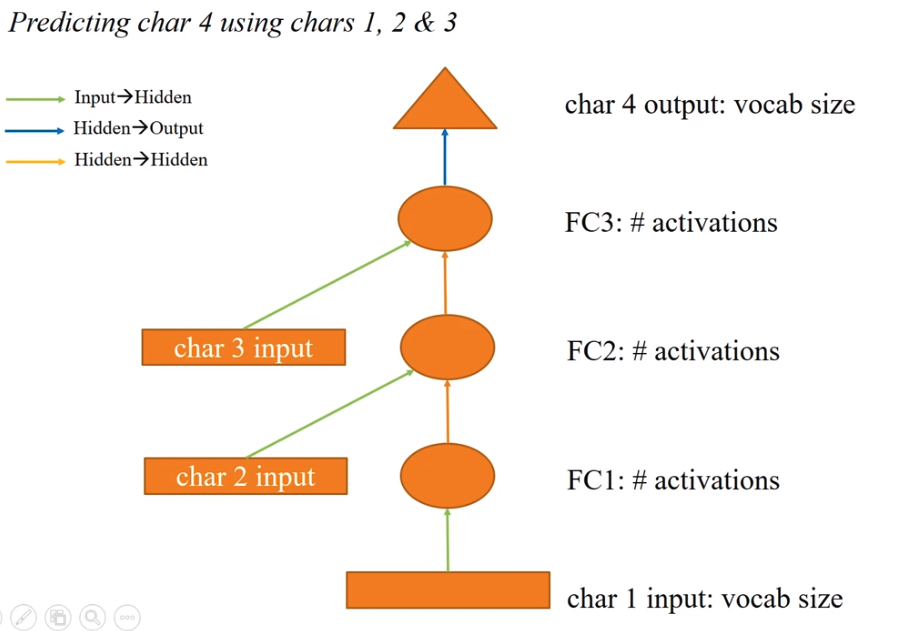

In [7]:
Image(filename='img/l8_6.png')

Мы можем наращивать вложенность сколько нам хочется. Но должно ли количество весов, так же должно расти с каждым новым слоем? Если да, то при увеличении влоденности сети, количество весов для обучения будет расти взрывным темпом. Но зачем нам столько разных весов, если смысл наших операций очень схож. 1) Мы обрабатываем букву на входе 2) Мы добавляем нелинейность в данные о букве при переходе между скрытыми слоями 3) мы получаем ответ.

По сути у нас должен быть набор из 3-х матриц весов W, для того чтобы полностью справиться с нашей схемой. 

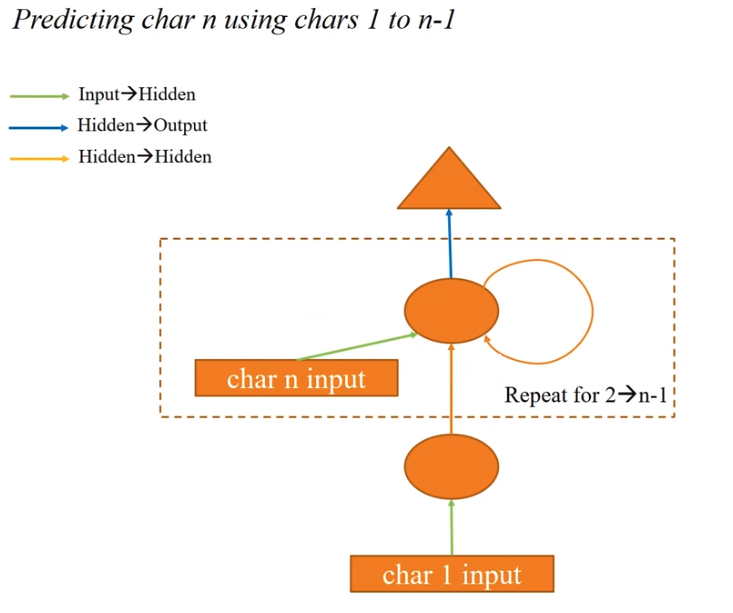

In [8]:
Image(filename='img/l8_7.png')

Теперь будем использовать более стандартную нотацию

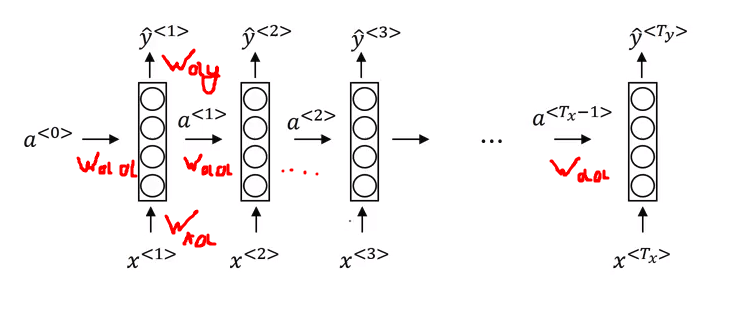

In [9]:
Image(filename='img/l8_8.png')

Нам надо обучить 3 набора весов $W_{xa}$ $W_{aa}$ $W_{ay}$

Обучение модели проходит старндартно. Вначале у нас есть forward pass, затем backward pass. 

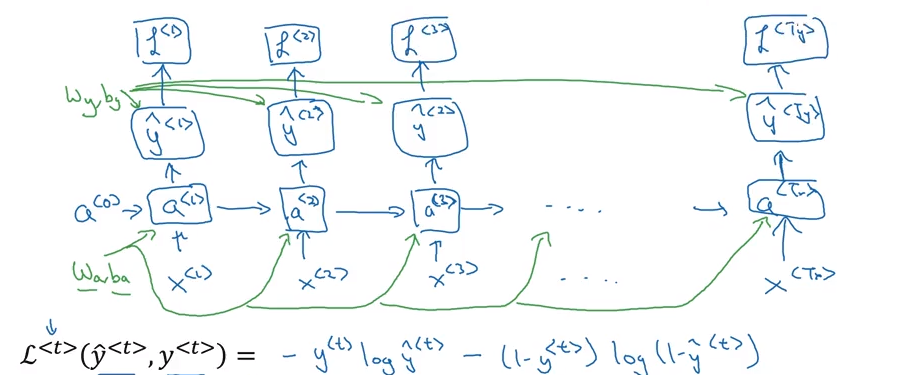

In [11]:
Image(filename='img/l8_10.png')

Основной проблемой здесь является горизонтальная связь - временнАя. При нахождении ошибки по ней используется алгоритм Backpropagation through time (BPTT).

Разбирать пошаговое обучение модели с извлечением градиентов мы не будем. Но копнуть глубже всегда можно в интернете.

Рассмотрим разные типы RNN.

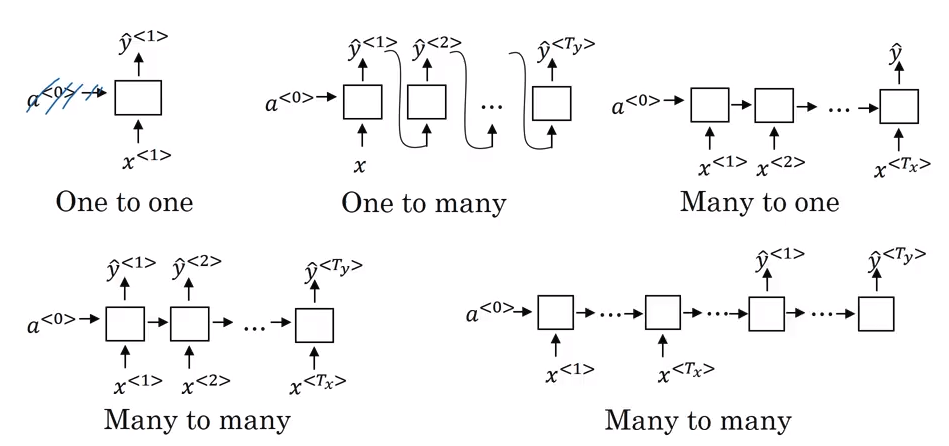

In [12]:
Image(filename='img/l8_9.png')

Примеры использования архитектур:

One to one - наша классическая архитектура NN.

One to many - Перед нами стоит задача генерации текста или музыки. Тогда на вход мы можем получить слово (или ноту), после чего сеть будет генерировать слово и подавать его на следующий вход. Таким образом может быть сгенерирован текст произвольной длины.

Many to one - Допустим мы хотим определить позитивную или негативную эмоциональную окраску рецензии фильма. Тогда мы прочтём всю рецензию целиком и ответ у нас будет только один.

Many to many (N(x) == N(y)) - если перед нами стоит задача определения части речи по слову (существительное, глагол, прилагательное). Для каждого слова в исходном тексте мы должны дать одну метку части речи.

Many to many (N(x) != N(y)) - классическая задача перевода. Текст на английском языке может содержать разное количество слов с его переводом на русский язык. У слов нет чёткого соответсвия одного с другим.

У RNN остро стоит проблема исчезающего градиента. Допустим у нас есть 2 предложения:<br>
Она, в чёрном пальто и строгом костюме зашла в кабинет<br>
Он, в чёрном пальто и строгом костюме зашёл в кабинет<br>

Местоимение (Он, Она) влияет на род глагола. Но стоят они друг от друга на достаточном расстоянии. При forward pass сеть скорее всего забудет о чём говорилось вначале предложения и не сможет понять какой род надо поставить. И при backward pass, градиент дойдёт до начала предложения практически нулевой.

Это и есть проблема исчезающего градиента. При прохождении множества операций, в каждой из которых градиент < 1, произведение градиентов будет стремиться к 0. Строго говоря есть так же проблема взрывающегося градиента, когда после прохождения многих операций, где градиент > 1 произведение градиентов будет очень большим числом. 

#### Long short-term memory (LSTM)

http://colah.github.io/posts/2015-08-Understanding-LSTMs/ (источник)


ещё раз посмотрим на визуальную структуру RNN

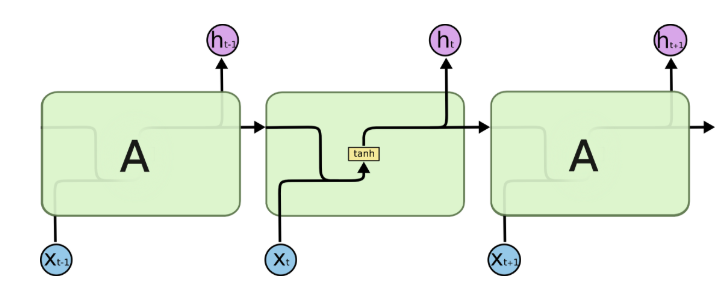

In [13]:
Image(filename='img/l8_11.png')

Проблема в том, что через череду нелинейных преобразований сеть забывает о контексте. Для решения этой структуры была представлена модель LSTM.

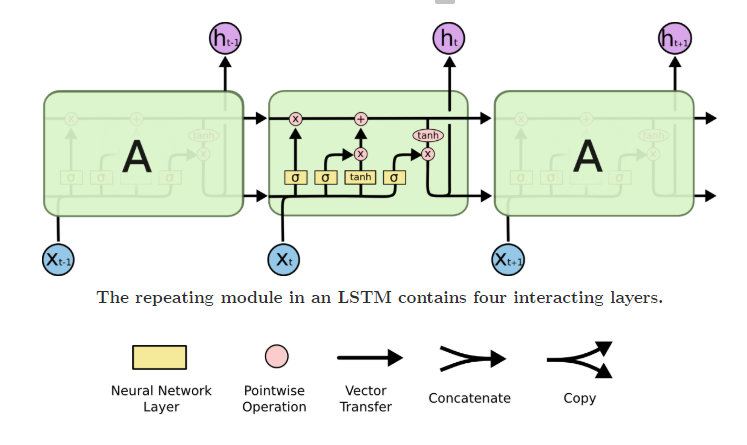

In [14]:
Image(filename='img/l8_12.png')

Теперь рекуррентная ячейка выглядит сверх сложной, но мы разберёмся шаг за шагом. В первую очередь обратим внимание, теперь на вход идёт два входа. Один мы можем представить как и в предыдущем случае - передача основной информации (нижняя стрелка). Второй - память, где будет храниться информация о долгосрочных зависимостях (верхняя стрелка).

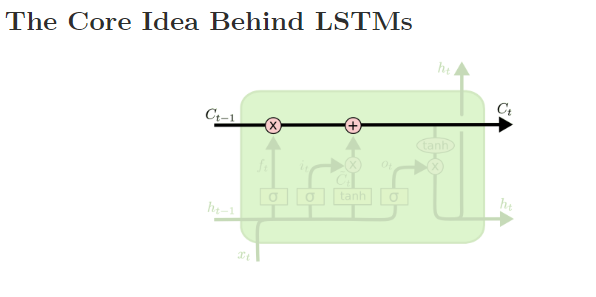

In [15]:
Image(filename='img/l8_13.png')

Поток информации на своём пути не встречает ни одной нелинейной функции, только произведения и суммы и сети довольно легко запоминать аспекты увиденного.

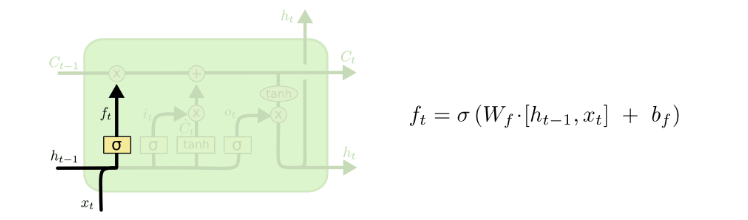

In [16]:
Image(filename='img/l8_14.png')

Первая операция - forgetting gate.

Ячейка хранит информацию об увиденном, допустим предыдущий объект был мужского пола, тогда как только объект повествования сменится, сеть захочет забыть об этой информации. Информация о новом слове проходит через сигмойду [0,1], с помощью которой сеть решает, что забыть. Где 0 будет "забыть", а 1 "помнить". 

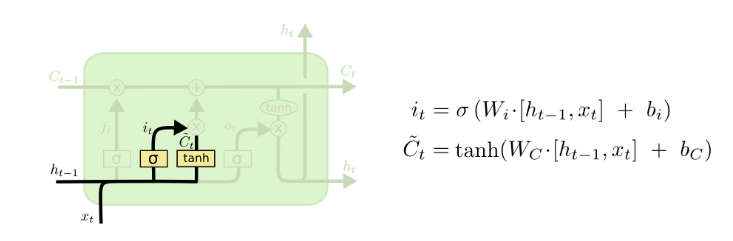

In [18]:
Image(filename='img/l8_15.png')

Вторая операция - "update gate".

При получении нового слова сеть выбирает какую часть информации от него надо запомнить. Получения вектора "смыслов" слова идет через tanh, а сигмойда выбирает, что из нынешнего вектора надо помнить.

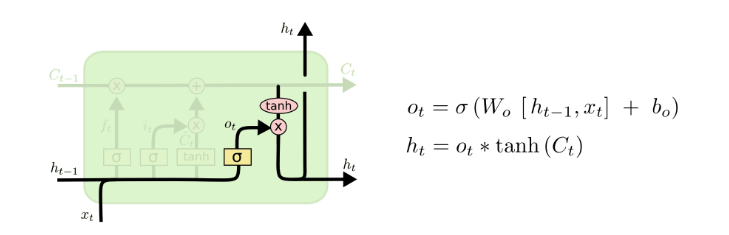

In [19]:
Image(filename='img/l8_16.png')

В конечном итоге мы должны получить информацию которую передадим дальше. Для этого мы пермножаем нашу память с текущим словом.

Так же как мы видели визуализации нейронов в свёрточных сетях, мы можем посмотреть на визуализацию некоторых нейронов в LSTM.

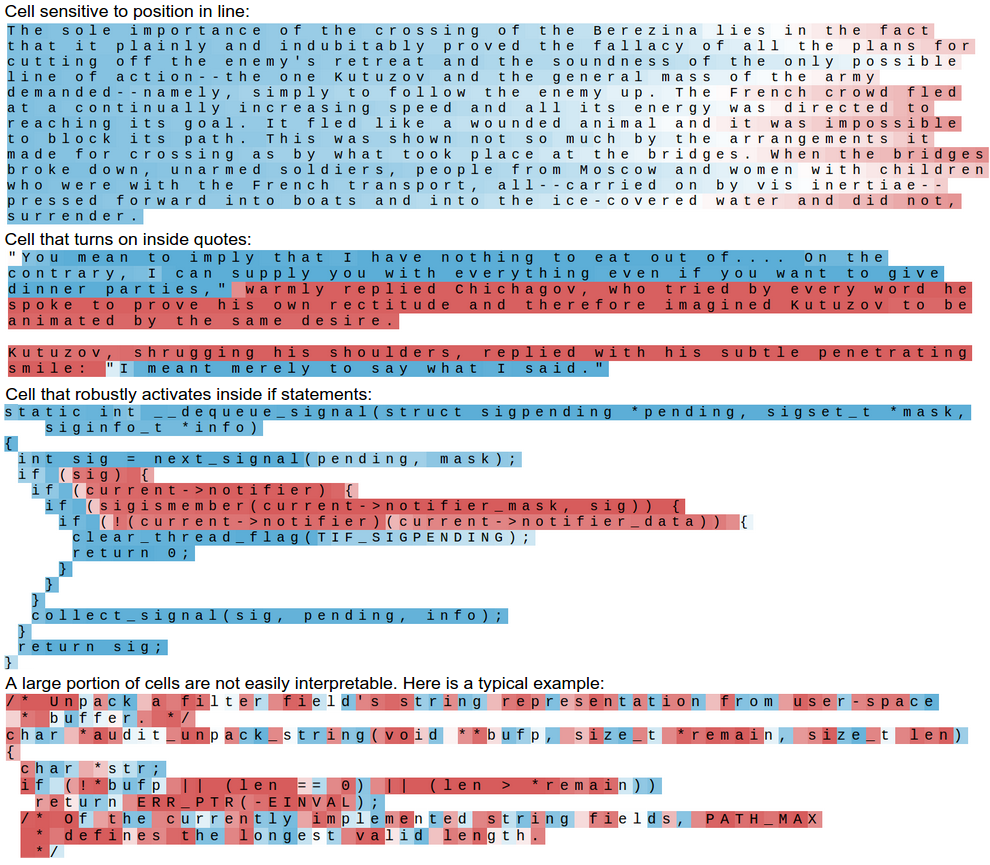

In [20]:
Image(filename='img/l8_17.png')

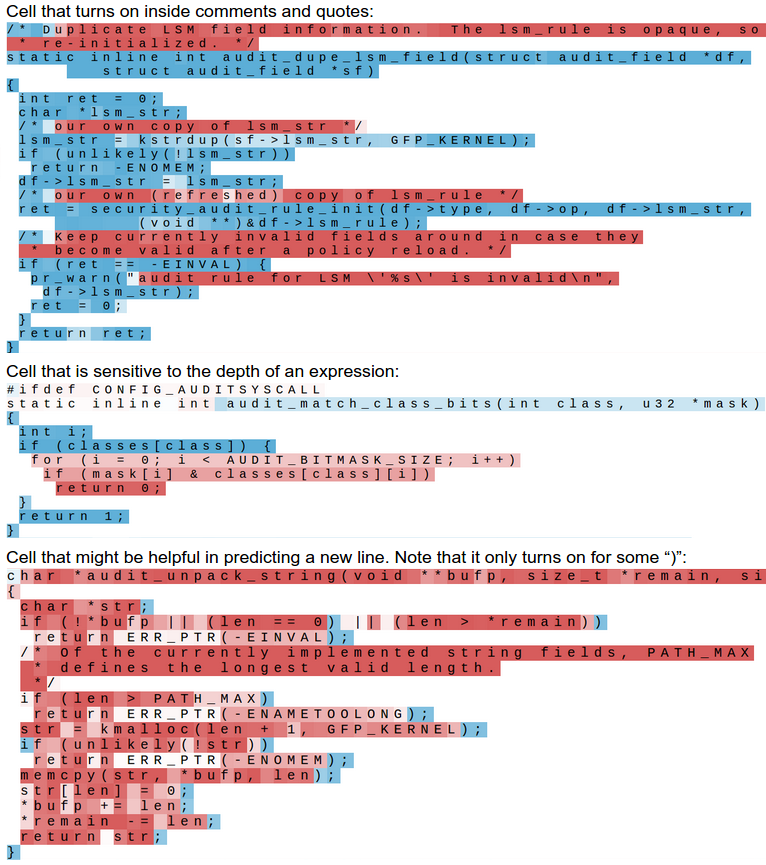

In [21]:
Image(filename='img/l8_18.png')